<a href="https://colab.research.google.com/github/gcarneiro1984/banana-split/blob/main/Projeto_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
# Ignorar avisos
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Exploração dos dados

In [ ]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
# Escolher 2000 linhas aleatórias do dataset
df = df.sample(n=2000, random_state=42)
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
7827,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


In [ ]:
df.shape

(2000, 15)

In [ ]:
# Separar variáveis independentes e dependente
X = df.drop('Income', axis=1)
y = df['Income']

In [ ]:
# Verificar valores únicos em colunas categóricas
print(df['Workclass'].unique())
print(df['Education'].unique())
print(df['Marital Status'].unique())
print(df['Occupation'].unique())
print(df['Relationship'].unique())
print(df['Race'].unique())
print(df['Gender'].unique())
print(df['Native Country'].unique())
print(df['Income'].unique())

[' Private' ' State-gov' ' Self-emp-not-inc' ' Self-emp-inc'
 ' Federal-gov' ' Local-gov' ' ?' ' Without-pay']
[' Some-college' ' HS-grad' ' Bachelors' ' Masters' ' Assoc-acdm'
 ' 7th-8th' ' 11th' ' Assoc-voc' ' Prof-school' ' 9th' ' 5th-6th' ' 10th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
[' Divorced' ' Married-civ-spouse' ' Never-married' ' Separated'
 ' Widowed' ' Married-spouse-absent']
[' Adm-clerical' ' Exec-managerial' ' Machine-op-inspct' ' Craft-repair'
 ' Prof-specialty' ' Sales' ' Handlers-cleaners' ' Other-service'
 ' Protective-serv' ' Priv-house-serv' ' Transport-moving' ' ?'
 ' Farming-fishing' ' Tech-support' ' Armed-Forces']
[' Not-in-family' ' Wife' ' Husband' ' Unmarried' ' Own-child'
 ' Other-relative']
[' White' ' Black' ' Other' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo']
[' Female' ' Male']
[' United-States' ' Mexico' ' Puerto-Rico' ' El-Salvador' ' ?' ' Columbia'
 ' Poland' ' Cambodia' ' Germany' ' Philippines' ' Canada' ' Ecuador'
 ' Italy' ' Cuba' ' Ir

In [ ]:
# Escolher todas as colunas menos a última
original_columns = df.columns[:-1]
original_columns

Index(['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 14160 to 8407
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             2000 non-null   int64 
 1   Workclass       2000 non-null   object
 2   Final Weight    2000 non-null   int64 
 3   Education       2000 non-null   object
 4   EducationNum    2000 non-null   int64 
 5   Marital Status  2000 non-null   object
 6   Occupation      2000 non-null   object
 7   Relationship    2000 non-null   object
 8   Race            2000 non-null   object
 9   Gender          2000 non-null   object
 10  Capital Gain    2000 non-null   int64 
 11  capital loss    2000 non-null   int64 
 12  Hours per Week  2000 non-null   int64 
 13  Native Country  2000 non-null   object
dtypes: int64(6), object(8)
memory usage: 234.4+ KB


In [ ]:
# If you want to display only integer columns you can do:
int_cols = X.select_dtypes(include=['int64']).columns
X[int_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 14160 to 8407
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             2000 non-null   int64
 1   Final Weight    2000 non-null   int64
 2   EducationNum    2000 non-null   int64
 3   Capital Gain    2000 non-null   int64
 4   capital loss    2000 non-null   int64
 5   Hours per Week  2000 non-null   int64
dtypes: int64(6)
memory usage: 109.4 KB


In [ ]:
# Display only object columns
obj_cols = X.select_dtypes(include=['object']).columns
X[obj_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 14160 to 8407
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       2000 non-null   object
 1   Education       2000 non-null   object
 2   Marital Status  2000 non-null   object
 3   Occupation      2000 non-null   object
 4   Relationship    2000 non-null   object
 5   Race            2000 non-null   object
 6   Gender          2000 non-null   object
 7   Native Country  2000 non-null   object
dtypes: object(8)
memory usage: 140.6+ KB


In [ ]:
# Display statistics of int_cols
X[int_cols].describe()


,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.06100,186761.137500,10.027000,1147.458500,93.388000,40.373500
std,13.66831,103805.537658,2.605699,7767.070991,421.662261,11.944134
min,17.00000,20534.000000,1.000000,0.000000,0.000000,2.000000
25%,28.00000,116554.250000,9.000000,0.000000,0.000000,40.000000
50%,38.00000,175931.000000,10.000000,0.000000,0.000000,40.000000
75%,48.00000,234358.500000,12.000000,0.000000,0.000000,45.000000
max,90.00000,972354.000000,16.000000,99999.000000,2559.000000,99.000000


In [ ]:
# Identificar outliers de int_cols e substituir por média
for col in int_cols:
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    X[col] = X[col].apply(lambda x: X[col].mean() if x < lower_bound or x > upper_bound else x)
print(X[int_cols].describe())


               Age   Final Weight  EducationNum  Capital Gain  capital loss  \
count  2000.000000    2000.000000   2000.000000   2000.000000   2000.000000   
mean     38.746927  177259.834556     10.299621    100.402619      4.435930   
std      13.134144   85428.542866      2.212285    324.314265     19.869136   
min      17.000000   20534.000000      5.000000      0.000000      0.000000   
25%      28.000000  116554.250000      9.000000      0.000000      0.000000   
50%      38.000000  175931.000000     10.000000      0.000000      0.000000   
75%      48.000000  224670.750000     12.000000      0.000000      0.000000   
max      78.000000  410439.000000     16.000000   1147.458500     93.388000   

       Hours per Week  
count     2000.000000  
mean        41.234911  
std          3.458221  
min         33.000000  
25%         40.000000  
50%         40.000000  
75%         40.373500  
max         52.000000  


# Feature Engineering

In [ ]:
# Uso de KBest
# Importar bibliotecas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # ANOVA para features categóricas


# Label Encoder para  X e y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_cols:
    X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)

# Aplicar SelectKBest
# Selecionar as melhores features
selector = SelectKBest(score_func=f_regression, k=6)
X_selected = selector.fit_transform(X, y)

# Quais colunas foram selecionadas
selected_indices = selector.get_support(indices=True)
selected_columns = [X.columns[i] for i in selected_indices]
print("Features selecionadas:", selected_columns)


Features selecionadas: ['Age', 'EducationNum', 'Marital Status', 'Relationship', 'Gender', 'Capital Gain']


In [ ]:
# Recursive Feature Elimination
# Importar bibliotecas
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Modelo base para seleção
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6)

X_rfe = rfe.fit_transform(X, y)
selected_indices = rfe.get_support(indices=True)
selected_columns = [X.columns[i] for i in selected_indices]
print("Features selecionadas:", selected_columns)

Features selecionadas: ['EducationNum', 'Marital Status', 'Relationship', 'Race', 'Gender', 'Hours per Week']


In [ ]:
# Redução de dimensionalidade - PCA
# Importar bibliotecas
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X, y)

# Verificar a quantidade de variância explicada por cada componente
print("Variância explicada por cada componente:", pca.explained_variance_)

Variância explicada por cada componente: [7.29803594e+09 1.05180565e+05 3.94432081e+02 1.67908993e+02
 4.91623781e+01 1.88791437e+01]


In [ ]:
print(X_rfe.shape[0], y.shape[0])  # Os dois valores devem ser iguais
print(X_selected.shape[0], y.shape[0])
print(X_pca.shape[0], y.shape[0])


2000 2000
2000 2000
2000 2000


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instanciar o modelo Random Forest
modelo = RandomForestClassifier(n_estimators = 200)

# Treinar o algoritmo para cada um dos seletores de atributos
modelo_rfe = modelo.fit(X_rfe, y)
modelo_kbest = modelo.fit(X_selected, y)
modelo_pca = modelo.fit(X_pca, y)

# Previsões
y_pred_rfe = modelo_rfe.predict(X_rfe)
y_pred_kbest = modelo_kbest.predict(X_selected)
y_pred_pca = modelo_pca.predict(X_pca)

# Avaliar os modelos
accuracy_rfe = accuracy_score(y, y_pred_rfe)
accuracy_kbest = accuracy_score(y, y_pred_kbest)
accuracy_pca = accuracy_score(y, y_pred_pca)

# Mostrar resultados
print("Acurácia com RFE:", accuracy_rfe)
print("Acurácia com SelectKBest:", accuracy_kbest)
print("Acurácia com PCA:", accuracy_pca)


Acurácia com RFE: 0.513
Acurácia com SelectKBest: 0.7835
Acurácia com PCA: 1.0


PCA deve ser selecionado para a escolha de atributos.

# Pré-processamento

In [ ]:
# Normalizar X com OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ohe = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), int_cols)], remainder='passthrough')
X_pca = ohe.fit_transform(X).toarray()

In [ ]:
X_pca

array([[ 0.,  0.,  0., ...,  4.,  0., 34.],
       [ 0.,  0.,  0., ...,  4.,  0., 34.],
       [ 0.,  0.,  0., ...,  2.,  1., 34.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  1., 34.],
       [ 0.,  0.,  0., ...,  1.,  1., 31.],
       [ 0.,  0.,  0., ...,  4.,  1., 34.]])

In [ ]:
# Separar dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Guardar as variáveis
import pickle
with open('/content/drive/MyDrive/census.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

# Treinamento de algoritmos

In [ ]:
# Treinar algoritmo RandomForest

# Importar bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instanciar o modelo
rf_model = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state = 42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.86


In [ ]:
# Decision Tree Classifier
# Importar as bibliotecas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Treinar o modelo
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")



Acurácia no conjunto de teste: 0.8125


In [ ]:
# Naive Bayes
# Importar bibliotecas
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Carregar base dados
from sklearn.datasets import load_iris
iris = load_iris()
X_pca = iris.data
y = iris.target

# Repartir X e y em treinamento e teste
from sklearn.model_selection import train_test_split
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Guardar as variáveis
import pickle
with open('/content/drive/MyDrive/iris.pkl', mode = 'wb') as f:
  pickle.dump([X_train_nb, y_train_nb, X_test_nb, y_test_nb], f)

# Treinar o modelo
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

# Avaliar o modelo
y_pred = nb_model.predict(X_test_nb)
accuracy = accuracy_score(y_test_nb, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 1.0000


In [ ]:
# Algoritmo KNN
# Importar bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Treinar o modelo
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 0.7925


In [ ]:
# Logistic Regression
# Importar bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Treinar o modelo
lr_model = LogisticRegression(random_state=42, max_iter=200)
lr_model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 0.8100


In [ ]:
# SVM
# Importar bibliotecas
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Treinar o modelo
svm_model = SVC(kernel='sigmoid', random_state=42)
svm_model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Acurácia no conjunto de teste: 0.7625


In [ ]:
# Redes neurais artificiais
# Importar bibliotecas
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Treinar o modelo
nn_model = MLPClassifier(max_iter=5600, verbose=True, tol=0.000000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (30, 30, 30))
nn_model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = nn_model.predict(X_test)
accuracy = accuracy
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

Iteration 1, loss = 0.61609026
Iteration 2, loss = 0.55839827
Iteration 3, loss = 0.54991918
Iteration 4, loss = 0.54653028
Iteration 5, loss = 0.53912658
Iteration 6, loss = 0.53141067
Iteration 7, loss = 0.51932163
Iteration 8, loss = 0.50158371
Iteration 9, loss = 0.47715147
Iteration 10, loss = 0.44940291
Iteration 11, loss = 0.42021818
Iteration 12, loss = 0.39225085
Iteration 13, loss = 0.37056347
Iteration 14, loss = 0.34865766
Iteration 15, loss = 0.32947786
Iteration 16, loss = 0.30685574
Iteration 17, loss = 0.28771232
Iteration 18, loss = 0.26885737
Iteration 19, loss = 0.24917550
Iteration 20, loss = 0.22894189
Iteration 21, loss = 0.21287356
Iteration 22, loss = 0.19347778
Iteration 23, loss = 0.17812022
Iteration 24, loss = 0.15546585
Iteration 25, loss = 0.13633183
Iteration 26, loss = 0.11845836
Iteration 27, loss = 0.10119532
Iteration 28, loss = 0.08280079
Iteration 29, loss = 0.06850452
Iteration 30, loss = 0.05615327
Iteration 31, loss = 0.04609549
Iteration 32, los

# Tuning dos parâmetros com GridSearch

In [ ]:
# Tuning dos parâmetros com GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np

# Carregar as variáveis
import pickle
with open('/content/drive/MyDrive/census.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

# Atributos previsores
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

# Atributos de classe
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

# Árvore de decisão
# Escolha dos parâmetros
parametros_arvore = {'criterion':['gini', 'entropy'],
              'splitter':['best'],
              'min_samples_split':[2, 5],
              'min_samples_leaf':[1, 5],
                     'random_state': [42]}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros_arvore)
grid_search.fit(X_credit, y_credit)
melhores_parametros_arvore = grid_search.best_params_
melhor_resultado_arvore = grid_search.best_score_
print(melhores_parametros_arvore)
print(melhor_resultado_arvore)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42, 'splitter': 'best'}
0.8145


In [ ]:
# Random Forest
# Escolha dos parâmetros
parametros_rf = {'criterion': ['gini', 'entropy'],
                 'n_estimators': [10, 40, 100, 150],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_rf)
grid_search.fit(X_credit, y_credit)
melhores_parametros_rf = grid_search.best_params_
melhor_resultado_rf = grid_search.best_score_
print(melhores_parametros_rf)
print(melhor_resultado_rf)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
0.8355


In [ ]:
# KNN
# Escolha dos parâmetros
parametros_knn = {'n_neighbors':[3, 5, 10, 20],
                  'p':[1, 2]
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn)
grid_search.fit(X_credit, y_credit)
melhores_parametros_knn = grid_search.best_params_
melhor_resultado_knn = grid_search.best_score_
print(melhores_parametros_knn)
print(melhor_resultado_knn)

{'n_neighbors': 20, 'p': 1}
0.8165000000000001


In [ ]:
# Regressão Logística
# Escolha dos parâmetros
parametros_lr = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga'],
                 'random_state': [0, 42]}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros_lr)
grid_search.fit(X_credit, y_credit)
melhores_parametros_lr = grid_search.best_params_
melhor_resultado_lr = grid_search.best_score_
print(melhores_parametros_lr)
print(melhor_resultado_lr)

{'C': 2.0, 'random_state': 0, 'solver': 'sag', 'tol': 0.0001}
0.8164999999999999


In [ ]:
# SVM
# Escolha dos parâmetros
parametros_svm = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                  'random_state': [42]}

grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros_svm)
grid_search.fit(X_credit, y_credit)
melhores_parametros_svm = grid_search.best_params_
melhor_resultado_svm = grid_search.best_score_
print(melhores_parametros_svm)
print(melhor_resultado_svm)

{'C': 1.5, 'kernel': 'linear', 'random_state': 42, 'tol': 0.001}
0.8125


In [ ]:
# Redes Neurais
# Escolha dos parâmetros
parametros_rn = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56],
              'learning_rate': ['constant', 'adaptive']}

grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros_rn)
grid_search.fit(X_credit, y_credit)
melhores_parametros_rn = grid_search.best_params_
melhor_resultado_rn = grid_search.best_score_
print(melhores_parametros_rn)
print(melhor_resultado_rn)

{'activation': 'relu', 'batch_size': 10, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.8210000000000001


# Validação Cruzada

In [ ]:
# Validação Cruzada
# Importar bibliotecas
from sklearn.model_selection import cross_val_score, KFold

# Rodar os algorítmos 300 vezes no total e guardar os resultados
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(10):
  print(i)
  kfold = KFold(n_splits=3, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(**melhores_parametros_arvore)
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(**melhores_parametros_rf)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier(**melhores_parametros_knn)
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(**melhores_parametros_lr)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(**melhores_parametros_svm)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(**melhores_parametros_rn)
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())

# Mostrar Melhores Resultados
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados

0
1
2
3
4
5
6
7
8
9


,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.796509,0.832999,0.818007,0.814002,0.818003,0.821001
1,0.811503,0.826501,0.813499,0.820511,0.817009,0.822003
2,0.793495,0.818502,0.812497,0.820004,0.811502,0.819493
3,0.796498,0.829993,0.814502,0.816490,0.810495,0.821995
4,0.803499,0.824497,0.810002,0.820002,0.815503,0.818001
5,0.780001,0.825496,0.820993,0.817497,0.807496,0.822496
6,0.791988,0.825991,0.809990,0.815997,0.809000,0.822502
7,0.795496,0.829004,0.818509,0.815995,0.810998,0.816506
8,0.810511,0.827008,0.807009,0.805007,0.807014,0.815502
9,0.785003,0.817507,0.814999,0.813511,0.807513,0.817509


# Teste de normalidade nos resultados

In [ ]:
# Shapiro
# Importar bibliotecas
from scipy.stats import shapiro

alpha = 0.05
# Testar os resultados com Shapiro

stat, p = shapiro(resultados_arvore)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Amostra de distribuição normal (falha em rejeitar H0)')
else:
	print('Amostra não é uma distribuição normal (rejeita-se H0)')

stat, p = shapiro(resultados_random_forest)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Amostra de distribuição normal (falha em rejeitar H0)')
else:
	print('Amostra não é uma distribuição normal (rejeita-se H0)')

stat, p = shapiro(resultados_knn)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Amostra de distribuição normal (falha em rejeitar H0)')
else:
	print('Amostra não é uma distribuição normal (rejeita-se H0)')


Statistics=0.951, p=0.683
Amostra de distribuição normal (falha em rejeitar H0)
Statistics=0.932, p=0.471
Amostra de distribuição normal (falha em rejeitar H0)
Statistics=0.977, p=0.949
Amostra de distribuição normal (falha em rejeitar H0)


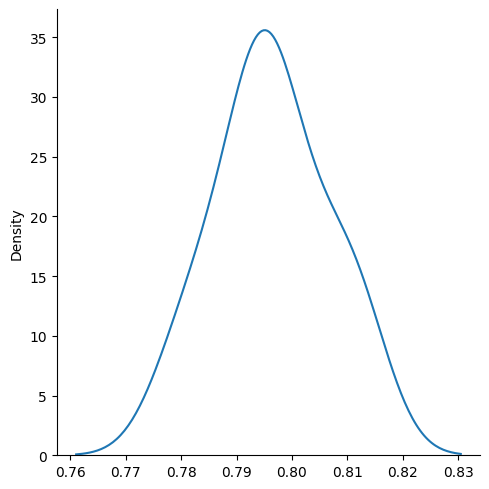

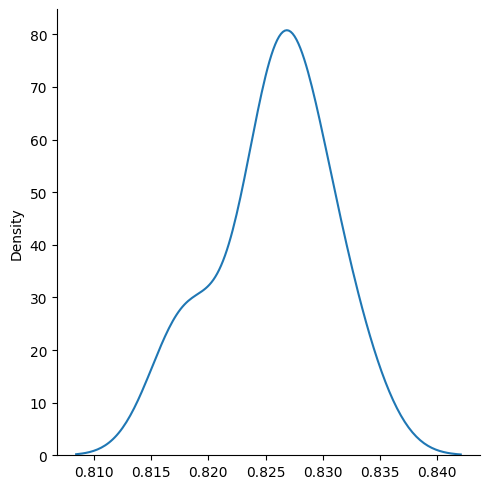

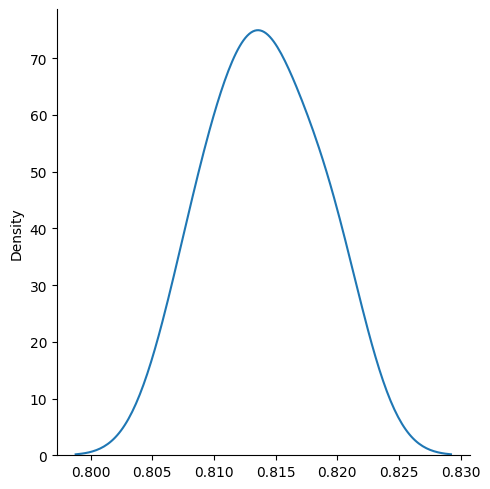

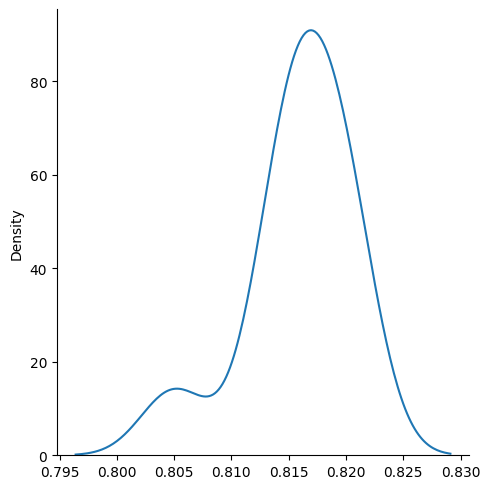

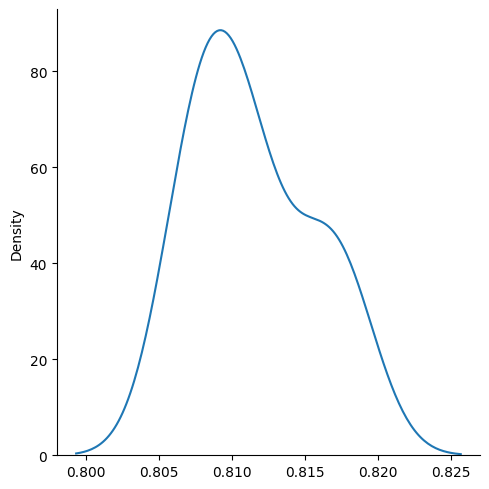

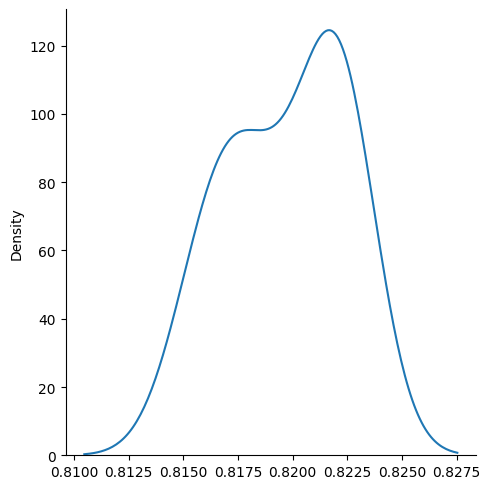

In [ ]:
# Histograma árvore de decisão
import seaborn as sns
sns.displot(resultados_arvore, kind = 'kde')

# Histograma Random Forest
sns.displot(resultados_random_forest, kind = 'kde')

# Histograma KNN
sns.displot(resultados_knn, kind = 'kde')

# Histograma Regressão Logística
sns.displot(resultados_logistica, kind = 'kde')

# Histograma SVM
sns.displot(resultados_svm, kind = 'kde')

# Histograma Redes Neurais
sns.displot(resultados_rede_neural, kind = 'kde')


# Teste de Hipótese com ANOVA e Tukey

Hipótese nula rejeitada. Dados são diferentes
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   0.0176    0.0  0.0102  0.0249   True
       arvore     logistica   0.0195    0.0  0.0121  0.0268   True
       arvore random_forest   0.0293    0.0  0.0219  0.0367   True
       arvore   rede_neural   0.0233    0.0  0.0159  0.0306   True
       arvore           svm    0.015    0.0  0.0076  0.0224   True
          knn     logistica   0.0019 0.9726 -0.0055  0.0093  False
          knn random_forest   0.0117 0.0002  0.0044  0.0191   True
          knn   rede_neural   0.0057 0.2175 -0.0017  0.0131  False
          knn           svm  -0.0025 0.9086 -0.0099  0.0048  False
    logistica random_forest   0.0098  0.003  0.0025  0.0172   True
    logistica   rede_neural   0.0038 0.6507 -0.0036  0.0112  False
    logistica   

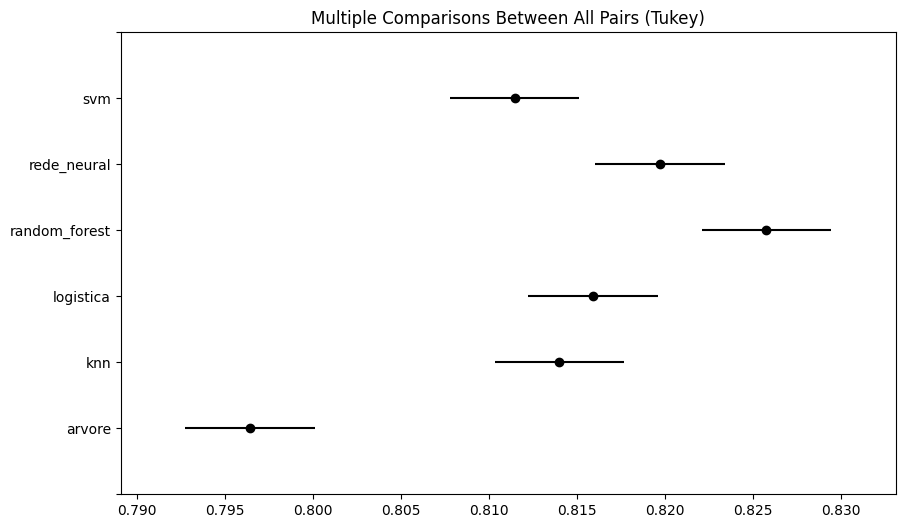

In [ ]:
# Teste de hipótese com ANOVA e Tukey
# Importar bibliotecas
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

# Função para o teste ANOVA
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

# Teste ANOVA
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

# Teste de Tukey
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                       'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                                       'random_forest','random_forest',
                                       'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                       'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                       'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                                       'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural'
                                       ]}

resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

# Função para comparar algoritmos
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

# Teste de Tukey
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

print(resultados.mean())

# Gráfico para observar o desempenho dos algoritmos
teste_estatistico.plot_simultaneous();


O melhor algoritmo é o de regressão logística estatisticamente

In [ ]:
print('Melhores resultados Regressão Logística')
print(resultados_logistica)
print('Melhores resultados Random Forest')
print(resultados_random_forest)
print('Melhores resultados SVM')
print(resultados_svm)
print('Melhores resultados Redes Neurais')
print(resultados_rede_neural)
print('Melhores resultados KNN')
print(resultados_knn)
print('Melhores resultados Árvore de Decisão')
print(resultados_arvore)
print('Melhores resultados')
print(resultados.mean().sort_values(ascending=False))

Melhores resultados Regressão Logística
[np.float64(0.8140021580801191), np.float64(0.8205109157133146), np.float64(0.8200044122083102), np.float64(0.8164904034469251), np.float64(0.8200021610816214), np.float64(0.8174966570768669), np.float64(0.8159966563264914), np.float64(0.8159951555753654), np.float64(0.8050066558312436), np.float64(0.8135106620863742)]
Melhores resultados Random Forest
[np.float64(0.8329994162078119), np.float64(0.8265011638324982), np.float64(0.8185021603312458), np.float64(0.8299926613269942), np.float64(0.8244969107038073), np.float64(0.8254964109536824), np.float64(0.825990908449679), np.float64(0.8290044167105636), np.float64(0.8270076673375025), np.float64(0.8175071623347486)]
Melhores resultados SVM
[np.float64(0.8180031605818713), np.float64(0.817008912960937), np.float64(0.8115019067043056), np.float64(0.8104949026988008), np.float64(0.8155029092060576), np.float64(0.8074964019491756), np.float64(0.8090001545773658), np.float64(0.8109984047015532), np.fl

# Salvar classificador treinado

In [ ]:
# Salvar classificador treinado
with open('/content/drive/MyDrive/census.pkl', mode = 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

# Atributos previsores e classe
X_census = np.concatenate((X_census_treinamento, X_census_teste), axis = 0)
y_census = np.concatenate((y_census_treinamento, y_census_teste), axis = 0)

# Regressão logística, SVM e Redes Neurais
classificador_rede_neural = MLPClassifier(**melhores_parametros_rn)
classificador_rede_neural.fit(X_census, y_census)

classificador_svm = SVC(**melhores_parametros_svm)
classificador_svm.fit(X_census, y_census)

classificador_logistica = LogisticRegression(**melhores_parametros_lr)
classificador_logistica.fit(X_census, y_census)

# Guardar os classificadores
import pickle
pickle.dump(classificador_rede_neural, open('/content/drive/MyDrive/rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_logistica, open('/content/drive/MyDrive/logistica_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('/content/drive/MyDrive/svm_finalizado.sav', 'wb'))

In [ ]:
# Verificar a distribuição da variável alvo
y_census_series = pd.Series(y_census)
y_census_series.value_counts()

,count
0,1522
1,478


# Teste dos classificadores

In [ ]:
# Testar os classificadores
# Carregar os classificadores guardados
import pickle

# Carregar modelos
classificador_rede_neural = pickle.load(open('/content/drive/MyDrive/rede_neural_finalizado.sav', 'rb'))
classificador_logistica = pickle.load(open('/content/drive/MyDrive/logistica_finalizado.sav', 'rb'))
classificador_svm = pickle.load(open('/content/drive/MyDrive/svm_finalizado.sav', 'rb'))

# Fazer previsões
y_pred_rede_neural = classificador_rede_neural.predict(X_census_teste)
y_pred_logistica = classificador_logistica.predict(X_census_teste)
y_pred_svm = classificador_svm.predict(X_census_teste)

# Avaliar performance
# Importar bibliotecas
from sklearn.metrics import accuracy_score

# Cálculo da acurácia
accuracy_rede_neural = accuracy_score(y_census_teste, y_pred_rede_neural)
accuracy_logistica = accuracy_score(y_census_teste, y_pred_logistica)
accuracy_svm = accuracy_score(y_census_teste, y_pred_svm)

# Resultados
print(f"Acurácia Rede Neural: {accuracy_rede_neural:.4f}")
print(f"Acurácia Regressão Logística: {accuracy_logistica:.4f}")
print(f"Acurácia SVM: {accuracy_svm:.4f}")


Acurácia Rede Neural: 0.8650
Acurácia Regressão Logística: 0.8325
Acurácia SVM: 0.9875


# Prever o futuro

## Exploração dos dados

In [ ]:
# Criar uma nova base de dados vazia com original_columns
new_data = pd.DataFrame(columns=original_columns)
new_data.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country


In [ ]:
# Valores max e min da coluna Age
print(df['Age'].min(), df['Age'].max())

17 90


In [ ]:
# Criar 5 linhas no dataframe new_data na coluna Age
new_data['Age'] = np.random.randint(df['Age'].min(), df['Age'].max(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Workclass
new_data['Workclass'] = np.random.choice(df['Workclass'].unique(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Education
new_data['Education'] = np.random.choice(df['Education'].unique(), size=5)

# Criar 5 linhas no dataframe new_data na coluna EducationNum
new_data['EducationNum'] = np.random.randint(df['EducationNum'].min(), df['EducationNum'].max(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Marital Status
new_data['Marital Status'] = np.random.choice(df['Marital Status'].unique(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Occupation
new_data['Occupation'] = np.random.choice(df['Occupation'].unique(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Relationship
new_data['Relationship'] = np.random.choice(df['Relationship'].unique(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Race
new_data['Race'] = np.random.choice(df['Race'].unique(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Gender
new_data['Gender'] = np.random.choice(df['Gender'].unique(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Capital Gain
new_data['Capital Gain'] = np.random.randint(df['Capital Gain'].min(), df['Capital Gain'].max(), size=5)

# Criar 5 linhas no dataframe new_data na coluna capital loss
new_data['capital loss'] = np.random.randint(df['capital loss'].min(), df['capital loss'].max(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Hours per Week
new_data['Hours per Week'] = np.random.randint(df['Hours per Week'].min(), df['Hours per Week'].max(), size=5)

# Criar 5 linhas no dataframe new_data na coluna Native Country
new_data['Native Country'] = np.random.choice(df['Native Country'].unique(), size=5)

In [ ]:
df.reset_index(drop=True, inplace=True)
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
1,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
2,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
3,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States,<=50K


In [ ]:
# Separar variáveis independentes e dependente
X = df.drop('Income', axis=1)
y = df['Income']

In [ ]:
# Verificar valores únicos em colunas categóricas
print(df['Workclass'].unique())
print(df['Education'].unique())
print(df['Marital Status'].unique())
print(df['Occupation'].unique())
print(df['Relationship'].unique())
print(df['Race'].unique())
print(df['Gender'].unique())
print(df['Native Country'].unique())
print(df['Income'].unique())

[' Private' ' State-gov' ' Self-emp-not-inc' ' Self-emp-inc'
 ' Federal-gov' ' Local-gov' ' ?' ' Without-pay']
[' Some-college' ' HS-grad' ' Bachelors' ' Masters' ' Assoc-acdm'
 ' 7th-8th' ' 11th' ' Assoc-voc' ' Prof-school' ' 9th' ' 5th-6th' ' 10th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
[' Divorced' ' Married-civ-spouse' ' Never-married' ' Separated'
 ' Widowed' ' Married-spouse-absent']
[' Adm-clerical' ' Exec-managerial' ' Machine-op-inspct' ' Craft-repair'
 ' Prof-specialty' ' Sales' ' Handlers-cleaners' ' Other-service'
 ' Protective-serv' ' Priv-house-serv' ' Transport-moving' ' ?'
 ' Farming-fishing' ' Tech-support' ' Armed-Forces']
[' Not-in-family' ' Wife' ' Husband' ' Unmarried' ' Own-child'
 ' Other-relative']
[' White' ' Black' ' Other' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo']
[' Female' ' Male']
[' United-States' ' Mexico' ' Puerto-Rico' ' El-Salvador' ' ?' ' Columbia'
 ' Poland' ' Cambodia' ' Germany' ' Philippines' ' Canada' ' Ecuador'
 ' Italy' ' Cuba' ' Ir

In [ ]:
# Escolher todas as colunas menos a última
original_columns = df.columns[:-1]
original_columns

Index(['Age', 'Workclass', 'Final Weight', 'Education', 'EducationNum',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'capital loss', 'Hours per Week', 'Native Country'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             2000 non-null   int64 
 1   Workclass       2000 non-null   object
 2   Final Weight    2000 non-null   int64 
 3   Education       2000 non-null   object
 4   EducationNum    2000 non-null   int64 
 5   Marital Status  2000 non-null   object
 6   Occupation      2000 non-null   object
 7   Relationship    2000 non-null   object
 8   Race            2000 non-null   object
 9   Gender          2000 non-null   object
 10  Capital Gain    2000 non-null   int64 
 11  capital loss    2000 non-null   int64 
 12  Hours per Week  2000 non-null   int64 
 13  Native Country  2000 non-null   object
dtypes: int64(6), object(8)
memory usage: 218.9+ KB


In [ ]:
# If you want to display only integer columns you can do:
int_cols = X.select_dtypes(include=['int64']).columns
X[int_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             2000 non-null   int64
 1   Final Weight    2000 non-null   int64
 2   EducationNum    2000 non-null   int64
 3   Capital Gain    2000 non-null   int64
 4   capital loss    2000 non-null   int64
 5   Hours per Week  2000 non-null   int64
dtypes: int64(6)
memory usage: 93.9 KB


In [ ]:
# Display only object columns
obj_cols = X.select_dtypes(include=['object']).columns
X[obj_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       2000 non-null   object
 1   Education       2000 non-null   object
 2   Marital Status  2000 non-null   object
 3   Occupation      2000 non-null   object
 4   Relationship    2000 non-null   object
 5   Race            2000 non-null   object
 6   Gender          2000 non-null   object
 7   Native Country  2000 non-null   object
dtypes: object(8)
memory usage: 125.1+ KB


In [ ]:
# Display statistics of int_cols
X[int_cols].describe()


,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.06100,186761.137500,10.027000,1147.458500,93.388000,40.373500
std,13.66831,103805.537658,2.605699,7767.070991,421.662261,11.944134
min,17.00000,20534.000000,1.000000,0.000000,0.000000,2.000000
25%,28.00000,116554.250000,9.000000,0.000000,0.000000,40.000000
50%,38.00000,175931.000000,10.000000,0.000000,0.000000,40.000000
75%,48.00000,234358.500000,12.000000,0.000000,0.000000,45.000000
max,90.00000,972354.000000,16.000000,99999.000000,2559.000000,99.000000


In [ ]:
# Identificar outliers de int_cols e substituir por média
for col in int_cols:
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    X[col] = X[col].apply(lambda x: X[col].mean() if x < lower_bound or x > upper_bound else x)
print(X[int_cols].describe())


               Age   Final Weight  EducationNum  Capital Gain  capital loss  \
count  2000.000000    2000.000000   2000.000000   2000.000000   2000.000000   
mean     38.746927  177259.834556     10.299621    100.402619      4.435930   
std      13.134144   85428.542866      2.212285    324.314265     19.869136   
min      17.000000   20534.000000      5.000000      0.000000      0.000000   
25%      28.000000  116554.250000      9.000000      0.000000      0.000000   
50%      38.000000  175931.000000     10.000000      0.000000      0.000000   
75%      48.000000  224670.750000     12.000000      0.000000      0.000000   
max      78.000000  410439.000000     16.000000   1147.458500     93.388000   

       Hours per Week  
count     2000.000000  
mean        41.234911  
std          3.458221  
min         33.000000  
25%         40.000000  
50%         40.000000  
75%         40.373500  
max         52.000000  


## Feature Engineering

In [ ]:
# Uso de KBest
# Importar bibliotecas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression  # ANOVA para features categóricas


# Label Encoder para  X e y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_cols:
    X[col] = le.fit_transform(X[col])
y = le.fit_transform(y)

# Aplicar SelectKBest
# Selecionar as melhores features
selector = SelectKBest(score_func=f_regression, k=6)
X_selected = selector.fit_transform(X, y)

# Quais colunas foram selecionadas
selected_indices = selector.get_support(indices=True)
selected_columns = [X.columns[i] for i in selected_indices]
print("Features selecionadas:", selected_columns)


Features selecionadas: ['Age', 'EducationNum', 'Marital Status', 'Relationship', 'Gender', 'Capital Gain']


In [ ]:
# Recursive Feature Elimination
# Importar bibliotecas
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Modelo base para seleção
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6)

X_rfe = rfe.fit_transform(X, y)
selected_indices = rfe.get_support(indices=True)
selected_columns = [X.columns[i] for i in selected_indices]
print("Features selecionadas:", selected_columns)

Features selecionadas: ['EducationNum', 'Marital Status', 'Relationship', 'Race', 'Gender', 'Hours per Week']


In [ ]:
# Redução de dimensionalidade - PCA
# Importar bibliotecas
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X, y)

# Verificar a quantidade de variância explicada por cada componente
print("Variância explicada por cada componente:", pca.explained_variance_)

Variância explicada por cada componente: [7.29803594e+09 1.05180565e+05 3.94432081e+02 1.67908993e+02
 4.91623781e+01 1.88791437e+01]


In [ ]:
print(X_rfe.shape[0], y.shape[0])  # Os dois valores devem ser iguais
print(X_selected.shape[0], y.shape[0])
print(X_pca.shape[0], y.shape[0])


2000 2000
2000 2000
2000 2000


## Pré-processamento

In [ ]:
# Normalizar X com OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ohe = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), int_cols)], remainder='passthrough')
X_pca = ohe.fit_transform(X).toarray()

In [ ]:
X_pca

array([[ 0.,  0.,  0., ...,  4.,  0., 34.],
       [ 0.,  0.,  0., ...,  4.,  0., 34.],
       [ 0.,  0.,  0., ...,  2.,  1., 34.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  1., 34.],
       [ 0.,  0.,  0., ...,  1.,  1., 31.],
       [ 0.,  0.,  0., ...,  4.,  1., 34.]])

## Previsões

In [ ]:
# Carregar classificador SVM
classificador_SVM = pickle.load(open('/content/drive/MyDrive/svm_finalizado.sav', 'rb'))

# Instanciar classificador_SVM
classificador_SVM = SVC(**melhores_parametros_svm)

# Treinar classificador_SVM
classificador_SVM.fit(X_census_treinamento, y_census_treinamento)

# Fazer previsões
y_pred_SVM = classificador_SVM.predict(X_census_teste)

# Apresentar previsões
print(y_pred_SVM)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [ ]:
# Avaliar as previsões
from sklearn.metrics import accuracy_score
accuracy_SVM = accuracy_score(y_census_teste, y_pred_SVM)
print(f"Acurácia SVM: {accuracy_SVM:.4f}")

Acurácia SVM: 0.8050
